***<h1 style ='text-align: center;'>Stamatics Summer Project</h1>***

<h2 style ='text-align: center;'>Bayesian Ranking and Analysis of Investment Strategies</h2>

**<h3 style ='text-align: center;'>Assignment 1</h3>**

**Problem Statement 1: Data Exploration & Visualization**

- `Obtaining Data`
Download 1 year of daily OHLCV data for any one stock of your choice listed on the Na-
tional Stock Exchange (NSE) using yfinance. `Clean and inspect the data`: handle missing
values and ensure datetime indexing. Refer to the resources to see a sample implementation.

In [3]:
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px


In [11]:
end_date = datetime(year=2025, month=4, day=30)
start_date = datetime(year=2024, month=4, day=30)


In [12]:
#obtaining data
ticker = "HAL.NS"
df = yf.download(
    tickers=ticker,
    start=start_date,
    end=end_date,
    interval="1d",
    group_by="ticker",
    auto_adjust=True,
    progress=False
)
df


Ticker           HAL.NS                                                
Price              Open         High          Low        Close   Volume
Date                                                                   
2024-04-30  3995.327661  3995.822702  3891.022421  3900.279785  2054258
2024-05-02  3902.903380  3933.695028  3892.408413  3908.051758  1008325
2024-05-03  3913.051758  3927.655468  3841.518330  3881.319580  1180369
2024-05-06  3896.962731  3899.338831  3747.509903  3778.548828  1613143
2024-05-07  3777.608478  3800.924958  3656.768916  3678.154785  1975562
...                 ...          ...          ...          ...      ...
2025-04-23  4304.899902  4360.000000  4255.299805  4307.000000  1803742
2025-04-24  4307.000000  4364.799805  4291.299805  4300.000000  1554043
2025-04-25  4305.000000  4339.000000  4147.500000  4196.399902  2298293
2025-04-28  4209.899902  4439.899902  4200.500000  4426.299805  4014638
2025-04-29  4473.000000  4660.000000  4448.500000  4609.299805  5185900

[247 rows x 5 columns]

In [13]:
#cleaning and inspecting the data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247 entries, 2024-04-30 to 2025-04-29
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (HAL.NS, Open)    247 non-null    float64
 1   (HAL.NS, High)    247 non-null    float64
 2   (HAL.NS, Low)     247 non-null    float64
 3   (HAL.NS, Close)   247 non-null    float64
 4   (HAL.NS, Volume)  247 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.6 KB


- No missing values 😁.

In [14]:
print(df.index)

DatetimeIndex(['2024-04-30', '2024-05-02', '2024-05-03', '2024-05-06',
               '2024-05-07', '2024-05-08', '2024-05-09', '2024-05-10',
               '2024-05-13', '2024-05-14',
               ...
               '2025-04-15', '2025-04-16', '2025-04-17', '2025-04-21',
               '2025-04-22', '2025-04-23', '2025-04-24', '2025-04-25',
               '2025-04-28', '2025-04-29'],
              dtype='datetime64[ns]', name='Date', length=247, freq=None)


- Indexing is date time 😁

- Visual Insight
Plot an `interactive candlestick chart` using `plotly.graph` objects or mplfinance. A
sample implementation is available in the resources. Annotate `at least 2` interesting pat-
terns or events (e.g., `gaps, sudden jumps/drops, trend reversals`) using `vertical lines or
markers`. (You can take a screenshot and manually mark the areas if you aren’t able to code
it.)

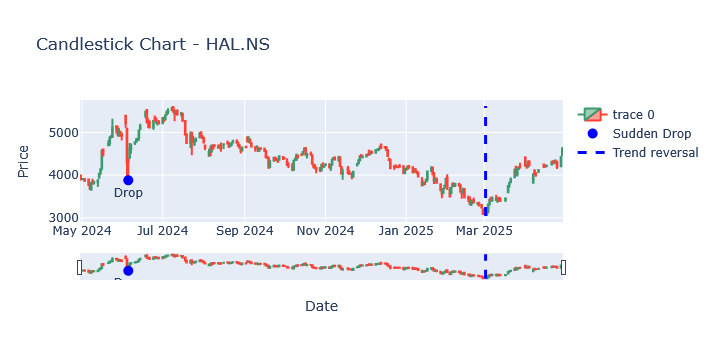

In [52]:
#plotting candlestick chart
fig = go.Figure(data=[
    go.Candlestick(x=df.index,
                   open=df[ticker]['Open'],
                   high=df[ticker]['High'],
                   low=df[ticker]['Low'],
                   close=df[ticker]['Close'])
              ])
fig.add_trace(go.Scatter(
    x=['2024-06-05'],
    y=[3881],
    mode='markers+text',
    marker=dict(size=10, color='blue'),
    text=["Drop"],  # Label
    textposition="bottom center",
    name="Sudden Drop"
))
fig.add_trace(go.Scatter(
    x=['2025-03-02', '2025-03-02'],
    y=[df[ticker]['Low'].min(), df[ticker]['High'].max()], 
    mode='lines',
    line=dict(color='blue', width=3, dash='dash'),
    name='Trend reversal'
))

fig.update_layout(title=f"Candlestick Chart - {ticker}", xaxis_title='Date', yaxis_title='Price')
fig.show()

- Reason for drop in price can be due to delay in deliveries of jets to army by HAL 
- Reason for trend reversal can be due to a good deal or delivery of jets 

**Problem Statement 2: Returns & Volatility**

- **Return Computation**
Compute both `simple and log returns`. `Plot` them side by side using `subplots` or Plotly.
Markdown: Why do they look similar? When might they `differ significantly`? Answer in a
`markdown cell` below the plots

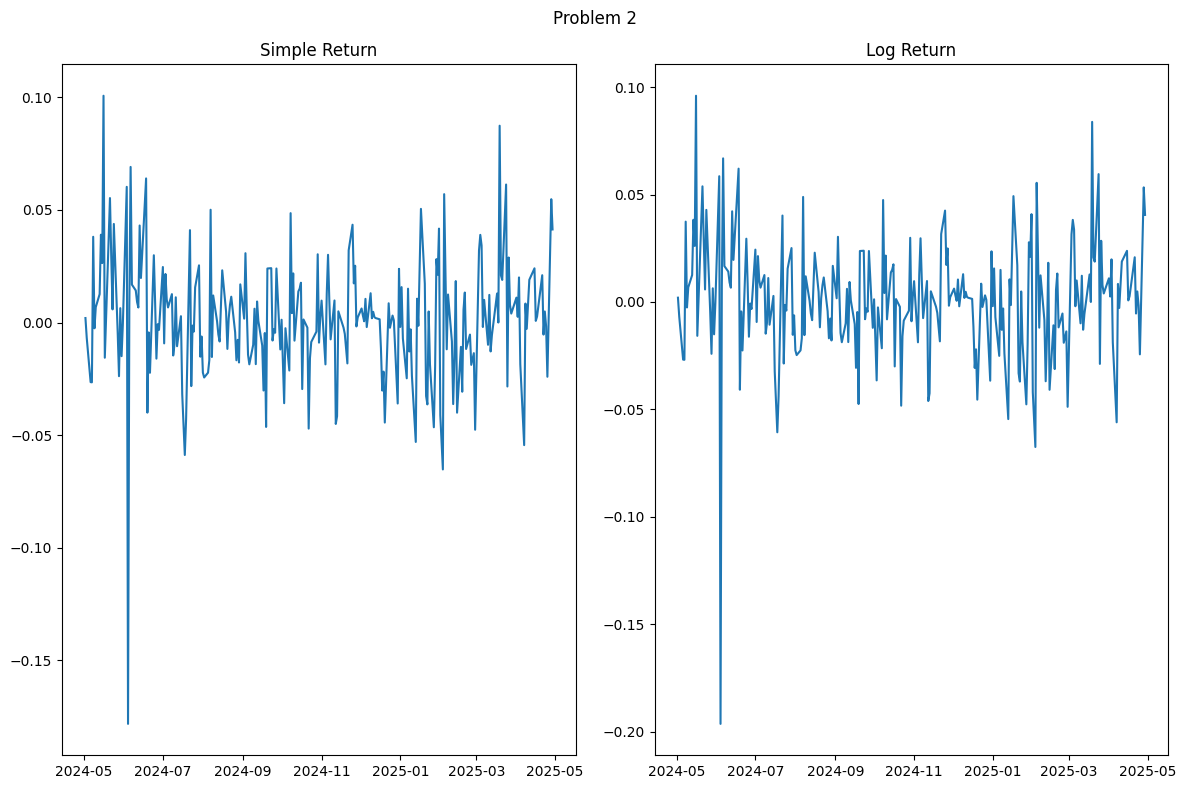

In [40]:
df.loc[:, (ticker, 'Daily Return')] = df[ticker]['Close'].pct_change()
df.loc[:, (ticker, 'Log Return')] = np.log(df[ticker]['Close'] / df[ticker]['Close'].shift(1))
fig,axs = plt.subplots(1,2,figsize=(12,8))
axs[0].plot(df.index,df[ticker]['Daily Return'])
axs[0].set_title("Simple Return")
axs[1].plot(df.index,df[ticker]['Log Return'])
axs[1].set_title("Log Return")
fig.suptitle("Problem 2")
plt.tight_layout()
plt.show()

- They are quite `similar` because they both are being calculated on `daily basis`.
So we are not able to see the `compounding effect` that creates difference between them.
Hence they will differ significantly when there is `significant change in price` between two days, or if we calculate the returns over `long periods`.

- **Volatility Estimation**
Compute rolling `14-day volatility` (standard deviation of daily returns). Plot it `along
with price`

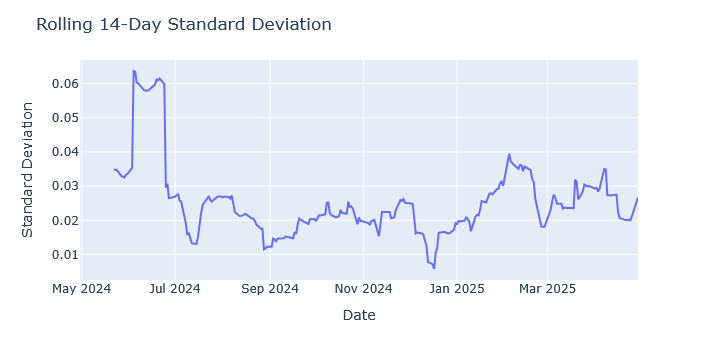

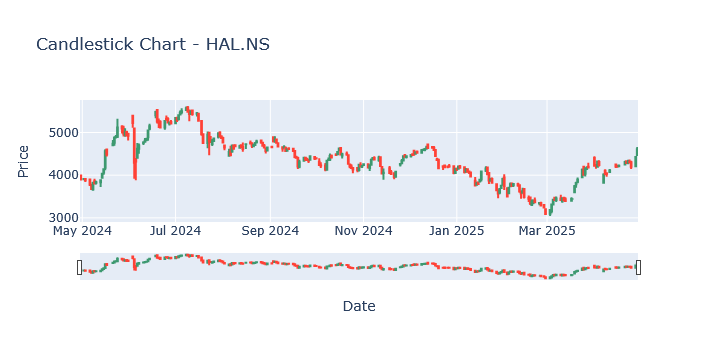

In [50]:
df.loc[:, (ticker, 'Rolling Std Dev')] = df[ticker]['Daily Return'].rolling(window=14).std()
fig1 = px.line(df, x=df.index, y=df[ticker]['Rolling Std Dev'])
fig1.update_layout(title='Rolling 14-Day Standard Deviation', xaxis_title='Date', yaxis_title='Standard Deviation')
fig1.show()
fig2 = go.Figure(data=[
    go.Candlestick(x=df.index,
                   open=df[ticker]['Open'],
                   high=df[ticker]['High'],
                   low=df[ticker]['Low'],
                   close=df[ticker]['Close'])
              ])
fig2.update_layout(title=f"Candlestick Chart - {ticker}", xaxis_title='Date', yaxis_title='Price')
fig2.show()
#as it was written to plot it along with price, I have plotted price by candlestick chart below it

**Part 1: Theory vs Reality**

In [53]:
from scipy.stats import binom

In [55]:
#making new column for dirn up or down
df.loc[:, (ticker, 'Direction')] = df[ticker]['Daily Return'].apply(lambda x: 'UP' if x > 0 else 'DOWN')
total_days = df[ticker]['Direction'].count()    #it will count non nan days  
up_days = (df[ticker]['Direction'] == 'UP').sum()
P_UP=up_days/total_days
print(f'P(UP)={P_UP:.3f}')

P(UP)=0.518


In [80]:
theoritical_probability_1 = binom.pmf(k=6, n=10, p=0.6)#Probability of exactly 6 up days in 10 days
theoritical_probability_2 = 1-binom.cdf(k=7, n=10, p=0.6)#Probability of at least 8 ups in 10days
real_probability_1 = binom.pmf(k=6, n=10, p=P_UP)#Probability of exactly 6 up days in 10 days
real_probability_2 = 1-binom.cdf(k=7, n=10, p=P_UP)#Probability of at least 8 ups in 10days
print(f"Theoretical P(X=6): {theoritical_probability_1:.3f}")
print(f"Theoretical P(X≥8): {theoritical_probability_2:.3f}")
print(f"Real P(X=6): {real_probability_1:.3f}")
print(f"Real P(X≥8): {real_probability_2:.3f}")

Theoretical P(X=6): 0.251
Theoretical P(X≥8): 0.167
Real P(X=6): 0.219
Real P(X≥8): 0.069


In [81]:
thousand_coin_flips=np.random.binomial(n=10, p=P_UP, size=1000)#basically simulating stock market with heads as up and tails as down

In [82]:
print(thousand_coin_flips)#the generated random binomial distribution

[ 7  9  4  6  6  4  6  7  3  5  4  7  5  4  4  9  5  7  6  6  4  8  6  6
  5  5  7  3  8  6  6  4  8  6  5  5  6  7  5  3  4  7  4  5  4  6  2  6
  6  8  4  6  7  5  9  4  5  4  4  3  3  9  4  4  4  5  4  2  6  5  5  5
  7  6  6  3  8  4  9  3  4  5  5  6  6  6  7  8  3  3  5  6  8  4  7  6
  5  3  5  2  5  3  6  2  0  5  7  7  5  7  6  5  7  6  4  8  4  3  5  6
  3  6  8  3  5  6  6  6  5  7  4  5  6  5  6  6  3  6  5  6  6  3  5  7
  5  8  7  5  2  5  6  4  7  4  2  6  2  8  6  7  4  4  3  5  5  3  9  5
  6  4  2  5  7  4  3  4  7  6  2  4  7  4  5  5  4  5  5  5  8  8  5  5
  3  4  7  6  3  8  6  4  6  5  4  6  6  5  9  6  7  4  5  4  6  6  5  4
  3  5  6  7  7  5  5  3  6  5  6  6  6  5  5  6  3  6  7  6  2  9  6  3
  6  6  5  6  5  5  6  8  6  5  6  4  6  4  5  6  4  6  5  6  5  5  5  6
  4  5  9  6  6  9  6  6  7  4  7  4  4  6  4  8  7  6  6  4  7  7  5  4
  4  5  7  6  6  9  4  4  4  4  7  6  4  4  3  5  3  6  6  2  6  2  5  7
  4  6  7  4  6  7  4  8  6  5  6  7  6  2  3  7  5

In [83]:
simulated_prob_6 = np.mean(thousand_coin_flips == 6)#P(X=6) simulated by my own P_UP
simulated_prob_8_or_more = np.mean(thousand_coin_flips >= 8)#P(X>=8) simulated by my own P_UP
print(simulated_prob_6 )
print(simulated_prob_8_or_more)

0.234
0.081


- P(X=6) is close for simulated and theoretical and real, but P(X>=8) is quite different for simulated and theoretical but is close with real because of the different P_UP for theoretical

**Part 2: The Paradox**

In [86]:
up_return_avg = df[ticker].loc[df[ticker]['Direction'] == 'UP', 'Daily Return'].mean()
down_return_avg = df[ticker].loc[df[ticker]['Direction'] == 'DOWN', 'Daily Return'].mean()
print(f'Average return on up days: {up_return_avg}')
print(f'Average return on down days: {down_return_avg}')

Average return on up days: 0.019683545701620356
Average return on down days: -0.019127508680212246


In [88]:
#to show that even with P(UP)=0.6, we can make a loss, i have extracted all windows of 10days in
#which ups are >=6 and ,down avg is more negative than up avg, hence giving loss.
results = []
data = df[ticker][['Daily Return', 'Direction']].copy()
for i in range(len(data) - 9):
    window = data.iloc[i:i+10]#rolling 10 day window
    
    up_returns = window[window['Direction'] == 'UP']['Daily Return']
    down_returns = window[window['Direction'] == 'DOWN']['Daily Return']
    
    if len(up_returns) >= 6:
        up_avg = up_returns.mean()
        down_avg = down_returns.mean()
        
        if down_avg < up_avg:
            results.append((data.index[i], data.index[i+9]))
# Displaying the date windows in which even with P(UP)>=0.6 we can lose money
for start, end in results:
    print(f"Window: {start.date()} to {end.date()}")

Window: 2024-05-02 to 2024-05-15
Window: 2024-05-03 to 2024-05-16
Window: 2024-05-06 to 2024-05-17
Window: 2024-05-07 to 2024-05-21
Window: 2024-05-08 to 2024-05-22
Window: 2024-05-09 to 2024-05-23
Window: 2024-05-10 to 2024-05-24
Window: 2024-05-13 to 2024-05-27
Window: 2024-05-14 to 2024-05-28
Window: 2024-05-15 to 2024-05-29
Window: 2024-05-16 to 2024-05-30
Window: 2024-05-21 to 2024-06-03
Window: 2024-05-28 to 2024-06-10
Window: 2024-05-29 to 2024-06-11
Window: 2024-05-30 to 2024-06-12
Window: 2024-05-31 to 2024-06-13
Window: 2024-06-03 to 2024-06-14
Window: 2024-06-04 to 2024-06-18
Window: 2024-06-05 to 2024-06-19
Window: 2024-06-06 to 2024-06-20
Window: 2024-06-07 to 2024-06-21
Window: 2024-06-10 to 2024-06-24
Window: 2024-06-11 to 2024-06-25
Window: 2024-06-12 to 2024-06-26
Window: 2024-06-24 to 2024-07-05
Window: 2024-06-25 to 2024-07-08
Window: 2024-06-28 to 2024-07-11
Window: 2024-07-01 to 2024-07-12
Window: 2024-07-02 to 2024-07-15
Window: 2024-07-03 to 2024-07-16
Window: 20

- **The math**
Let `UP average` be `ua` , and `DOWN average` be `da`,
then for loss,
      6*ua + 4*da < 0 
    =>`ua<(-2da/3)` ,
  will end up giving loss to us 😁

**Part 3: The Ultimate Question**

- The net return should be positive to make a profit, which is
 
  `(win_up)*(P(UP))-(lose_down)*(P(DOWN))= net_return`

- Here `win_up = 100`, and `lose_down = 150`.
- Also `P(DOWN) = 1 - P(UP)` , hence by the equation,
- =>`net_return = 250*P(UP)-150`

- Hence, for the net_return to be `positive`,
250*P(UP)-150>0,
  =>`P(UP) > 0.6`

  Therefore, if we again see by the 10 day example, out of 10 days the daily return must be positive for X>=7 days for me to have profit.

- And for my case of stocks of HAL the P(UP) was 0.518 which is far from 0.6, hence I would not take this bet

- Therefore, before accepting this bet, we must carefully analyze our stock’s past trends. If **P(UP) is below 0.6**, the `bet is more likely to return in loss`, and we would avoid the bet in such a case

**Your thoughts (No judgments) (Optional)**

- My expectations from this project are that, at the end of this project I will be well versed with different investment strategies and also with python and statistical methods to calculate probability.

- Yes, I am happy with the allotment of this project to me, also It was my first preference.

- The buzzwords that caught my attention to apply for this project were, `Bayesian` and `Investment Strategies`. 